"fMRI Data Structure" fMRI tutorial in Coursera course fmri003
https://class.coursera.org/fmri-003/wiki/fMRI_Data_Structure_Tutorial

This tutorial requires Internet access to download data, or requires the data from https://d396qusza40orc.cloudfront.net/fmri/MoAEpilot.zip to be unzipped in this same directory.

Created by: Ben Cipollini <bcipolli@ucsd.edu>

In [17]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import tempfile

import nibabel
from nilearn.datasets.utils import _fetch_files
from nilearn.image import index_img
from nilearn.plotting import plot_anat, plot_stat_map


In [18]:
%matplotlib inline

In [22]:
# Downloading data. Use nilearn as their downloads are resumable.
print("Downloading data...")
_fetch_files(data_dir='.', files=[('MoAEpilot', 'https://d396qusza40orc.cloudfront.net/fmri/MoAEpilot.zip', {'uncompress': True})], verbose=0)
print("Finished downloading data.")


Finished downloading data.


Loading structural data...
Structural image size: (256, 256, 54, 1)


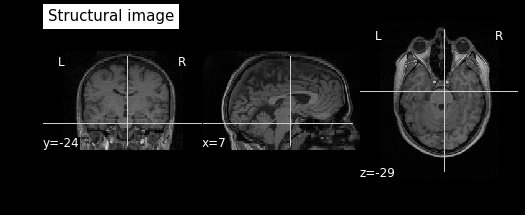

In [20]:
# Load structural data
print("Loading structural data...")
this_dir = os.getcwd()
struct_file = os.path.join(this_dir, 'MoAEpilot/sM00223/sM00223_002.img')
struct_img = nibabel.load(struct_file)

# Convert from Analyze format to NiImg format to avoid errors later.
struct_filename = tempfile.mkstemp()[1] + '.nii' # temp filename
nibabel.save(struct_img, struct_filename)
struct_img = nibabel.load(struct_filename)

# output
print("Structural image size: %s" % str(struct_img.shape))
plot_anat(struct_img, title='Structural image')


Loading all functional images into a single volume...
Functional volume size: (64, 64, 64, 96)


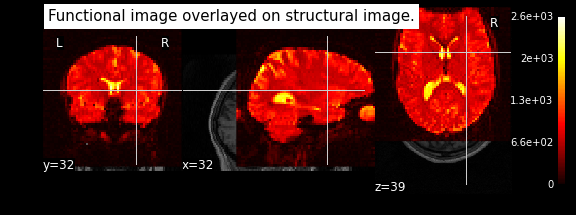

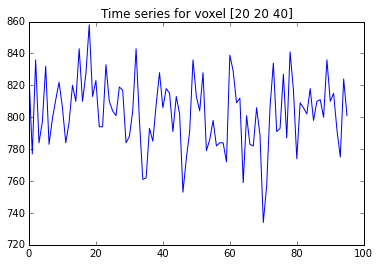

In [21]:

# Input the functional volume
print("Loading all functional images into a single volume...")
all_files = glob.glob(os.path.join(this_dir, 'MoAEpilot/fM00223/*.img'))
all_images = [nibabel.funcs.four_to_three(nibabel.load(f))[0]
              for f in all_files]

# Convert from Analyze format to NiImg format to avoid errors later.
func_filename = tempfile.mkstemp()[1] + '.nii'  # temp filename
func_img = nibabel.funcs.concat_images(all_images)
nibabel.save(func_img, func_filename)
func_img = nibabel.load(func_filename)


# Define things of interest
z_slice_idx = 39  # 40th image
time_idx = 29  # 30th time point
vox_idx = (19, 19, z_slice_idx)

# output
print("Functional volume size: %s" % str(func_img.shape))
img_at_one_TR = index_img(func_img, time_idx)
plot_stat_map(img_at_one_TR, bg_img=struct_img,
              cut_coords=(32, 32, z_slice_idx),
              title='Functional image overlayed on structural image.')
time_data = func_img.get_data()[vox_idx]
fh = plt.figure()
fh.gca().plot(time_data)
fh.gca().set_title('Time series for voxel %s'
                   % str(np.asarray(vox_idx) + 1))  # 1-based idx
